In [28]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# create an Observables object to store information for derivatives
obs = Observables(parameters= ['omega_b', 'omega_cdm', 'h', 'n_s', 'A_s', 'tau_reio'],
                  fiducial=[2.25905508e-02,   1.10739843e-01,   7.11166375e-01,
         9.64799673e-01,   2.16042894e-09,   8.57045188e-02],
                  left=[2.15905508e-02,   1.00739843e-01,   7.01166375e-01,
         9.54799673e-01,   2.06042894e-09,   8.47045188e-02],
                  right=[2.35905508e-02,   1.20739843e-01,   7.21166375e-01,
         9.74799673e-01,   2.26042894e-09,   8.67045188e-02])

In [31]:
# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes',
                   'non linear': 'halofit'}
# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [32]:
classy_template

{'A_s': 2.16042894e-09,
 'h': 0.711166375,
 'l_max_scalars': 2500,
 'lensing': 'yes',
 'n_s': 0.964799673,
 'non linear': 'halofit',
 'omega_b': 0.0225905508,
 'omega_cdm': 0.110739843,
 'output': 'tCl pCl lCl',
 'tau_reio': 0.0857045188}

In [33]:
# generate the fiducial cosmology
obs.compute_cosmo(key='CLASS_fiducial', classy_dict=classy_template)

In [20]:
# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_CLASS_left', classy_dict=classy_left)
    obs.compute_cosmo(key=par + '_CLASS_right', classy_dict=classy_right)

In [24]:
example_Planck = CMB_Primary(
    theta_fwhm=[7.], sigma_T=[33.], sigma_P=[56.],
    f_sky=0.65, l_min=2, l_max=2500)

In [25]:
fisher = example_Planck.get_fisher(obs)

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{n\\_s}$', '$\\mathrm{A\\_s}$', '$\\mathrm{tau\\_reio}$']


<Figure size 432x288 with 0 Axes>

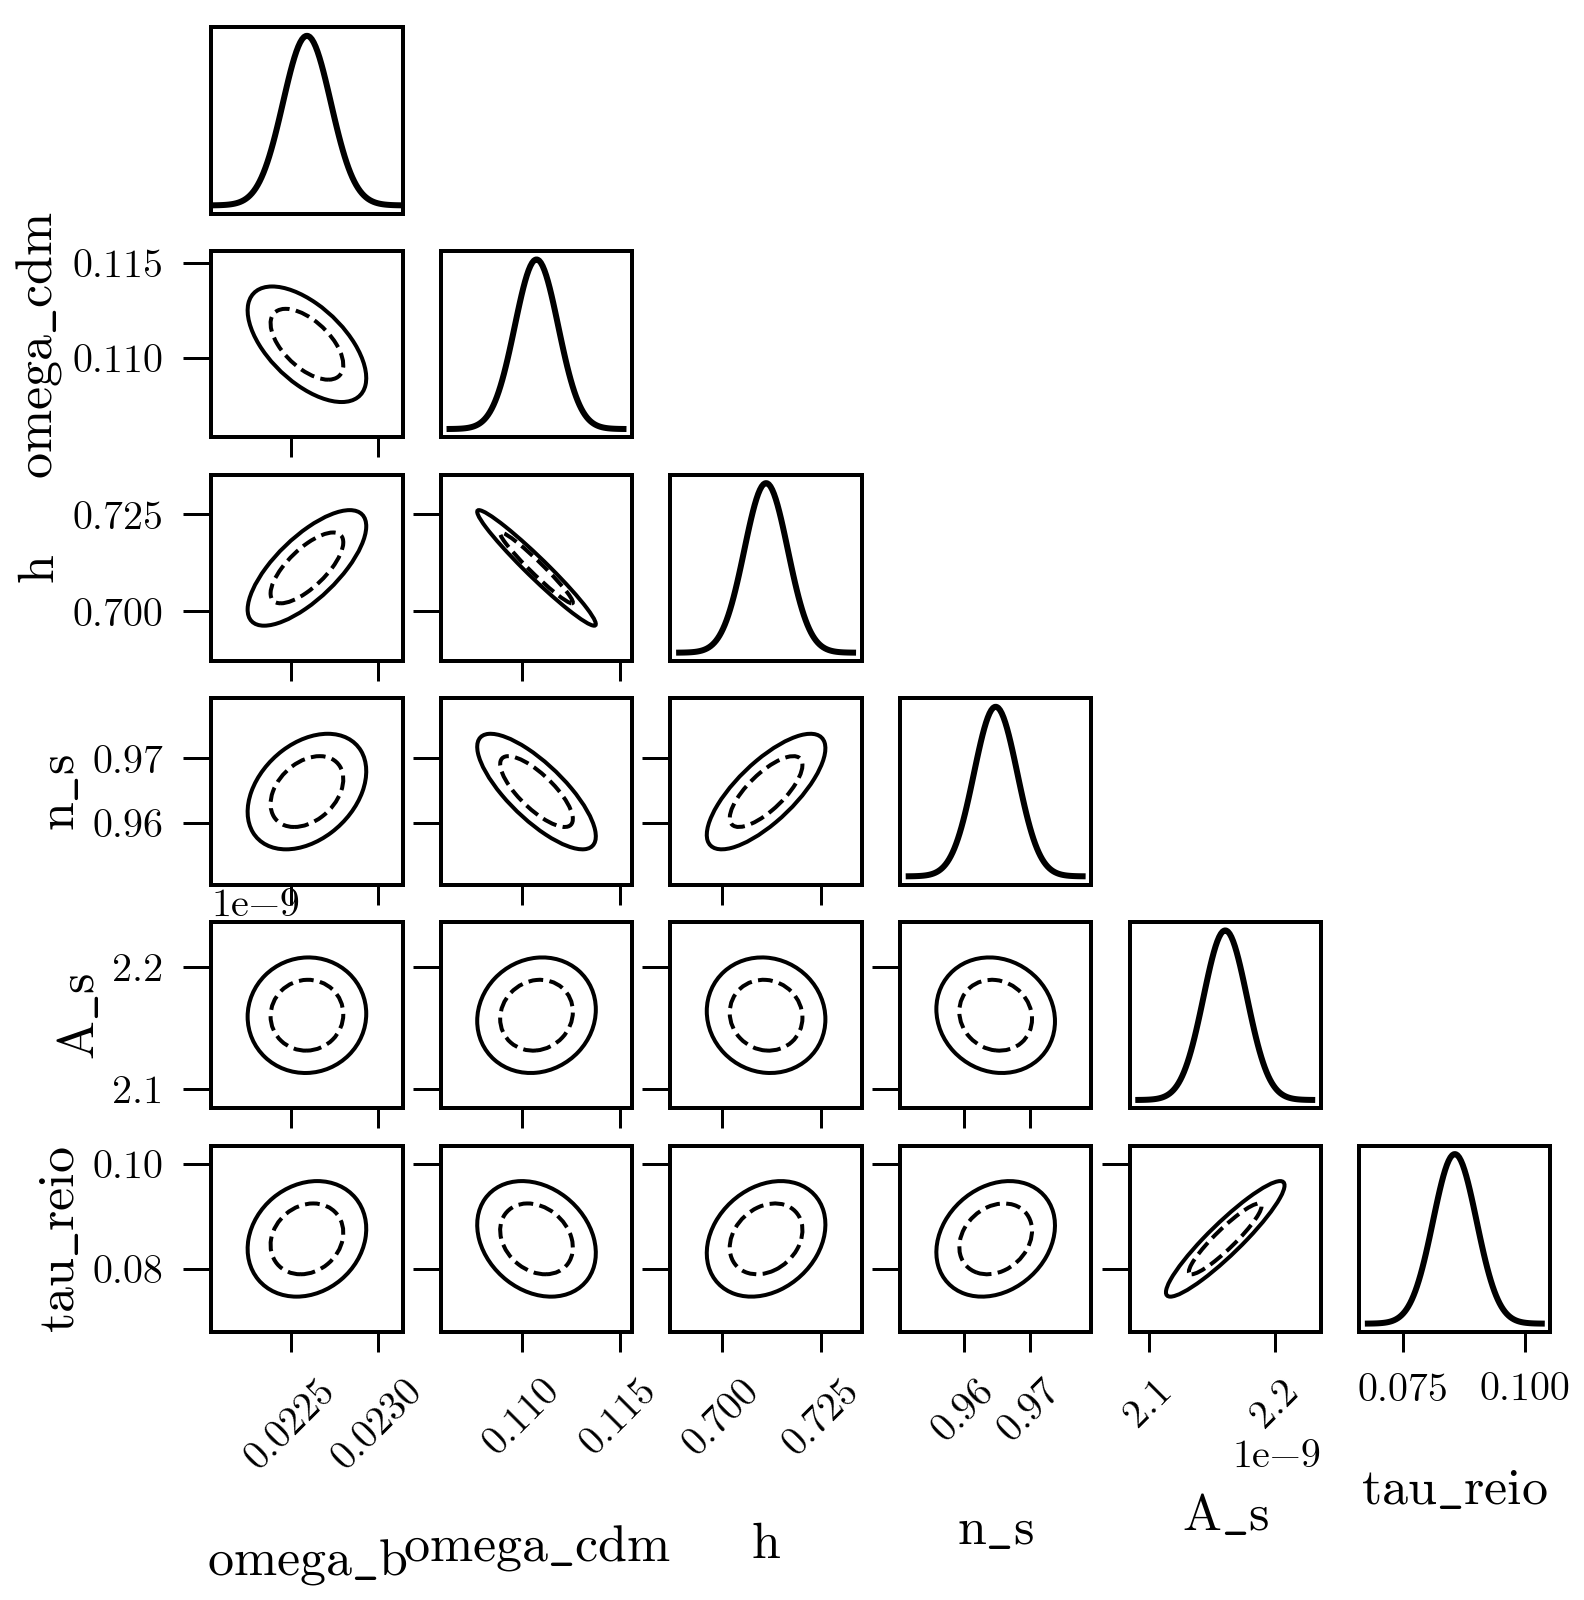

In [27]:
cov = np.linalg.inv(fisher)
fishchips.util.plot_triangle(obs, cov);